# Clinic 5 - Timeseries analysis (Bootcamp)

### Learning goals

After this clinic/bootcamp you should be able to:

- Fetch stock market data using `yfinance`.
- Visualize stock trends in different ways.
- Compute and interpret moving averages.
- Identify seasonality and trends in time series data.
- Build predictive models for timeseries (ARIMA).
- Identify the right order (p,d,q) for ARIMA models using ACF/PACF plots or cross-validation (AIC criterion)
- Make forecasts with timeseries and measure the errors.

##  Part 1: Mathematical finance 

Prior to the 1980s, banking and finance were well-known for being "boring"; investment banking was distinct from commercial banking and the primary role of the industry was handling "simple" (at least in comparison to today) financial instruments, such as loans. Deregulation (in the US happened under the Reagan administration), coupled with an influx of mathematics and computing power have transformed the industry from the "boring" business of banking to what it is today. 

* Advanced mathematics, such as analysis of the [Black-Scholes model](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model), is now essential to finance. 
* Algorithms are now responsible for making split-second decisions. In fact, [the speed at which light travels is a limitation when designing trading systems](http://www.nature.com/news/physics-in-finance-trading-at-the-speed-of-light-1.16872). 
* [Machine learning and data mining techniques are popular](http://www.ft.com/cms/s/0/9278d1b6-1e02-11e6-b286-cddde55ca122.html#axzz4G8daZxcl) in the financial sector. For example, **high-frequency trading (HFT)** is a branch of algorithmic trading where computers make thousands of trades in short periods of time, engaging in complex strategies such as statistical arbitrage and market making. HFT was responsible for phenomena such as the [2010 flash crash](https://en.wikipedia.org/wiki/2010_Flash_Crash) and a [2013 flash crash](http://money.cnn.com/2013/04/24/investing/twitter-flash-crash/) prompted by a hacked [Associated Press tweet](http://money.cnn.com/2013/04/23/technology/security/ap-twitter-hacked/index.html?iid=EL) about an attack on the White House.

In [67]:
#imports and setup

import numpy as np
import pandas as pd
#from pandas_datareader import data as pdr
from datetime import datetime

#this is used as override for pandas_datareader
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## Getting and Visualizing Stock Data

### The `pandas_datareader` package (for historical reasons)

`pandas_datareader` extracts data from various internet sources into a pandas DataFrame. Here are the currently listed available [modules](https://pydata.github.io/pandas-datareader/py-modindex.html):

	pandas_datareader.av.forex	
    pandas_datareader.av.quotes	
    pandas_datareader.av.sector	
    pandas_datareader.av.time_series	
    pandas_datareader.bankofcanada	
    pandas_datareader.econdb	
    pandas_datareader.enigma	
    pandas_datareader.eurostat	
    pandas_datareader.famafrench	
    pandas_datareader.fred	
    pandas_datareader.iex.daily	
    pandas_datareader.iex.deep	
    pandas_datareader.iex.market	
    pandas_datareader.iex.ref	
    pandas_datareader.iex.stats	
    pandas_datareader.iex.tops	
    pandas_datareader.moex	
    pandas_datareader.nasdaq_trader	
    pandas_datareader.naver	
    pandas_datareader.oecd	
    pandas_datareader.quandl	
    pandas_datareader.stooq	
    pandas_datareader.tiingo	
    pandas_datareader.tsp	
    pandas_datareader.wb	
    pandas_datareader.yahoo.actions	
    pandas_datareader.yahoo.components	
    pandas_datareader.yahoo.daily	
    pandas_datareader.yahoo.fx	
    pandas_datareader.yahoo.options	
    pandas_datareader.yahoo.quotes

Note there are various sources for financial date (yahoo, fred, iex...). Some of these APIs have turned to paid versions, therefore make `pandas_datareader` not very useful. However, we keep it here for historical reasons

### The `yfinance` package

Here we will use the `yfinance` [package](https://pypi.org/project/yfinance/) to get some data and import them since many of the import functions of `pandas_datareader` have been deprecated.

Now let's get some data. We first plot the Apple stock.

In [68]:
start = datetime(2015, 2, 15)
end = datetime(2025, 2, 15)

AAPL = yf.Ticker("AAPL").history(start = start, end= end)

#deprecated in late 2024!
#AAPL = pdr.get_data_yahoo("AAPL", start=start, end=end)

#deprecated in late 2023!
#AAPL = web.iex.daily.IEXDailyReader(symbols="AAPL", start=start, end=end, api_key=token)
#AAPL = AAPL.read()

print(type(AAPL))
AAPL.tail()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-10 00:00:00-05:00,229.570007,230.589996,227.199997,227.649994,33115600,0.25,0.0
2025-02-11 00:00:00-05:00,228.199997,235.229996,228.130005,232.619995,53718400,0.00,0.0
2025-02-12 00:00:00-05:00,231.199997,236.960007,230.679993,236.869995,45243300,0.00,0.0
2025-02-13 00:00:00-05:00,236.910004,242.339996,235.570007,241.529999,53614100,0.00,0.0
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.00,0.0


What does this data mean? 
* **High** is the highest price of the stock on that trading day, 
* **Low** the lowest price of the stock on that trading day, 
* **Open** is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day)
* **Close** the price of the stock at closing time
* **Volume** indicates how many stocks were traded 
* **Dividends** payout of company profits per share) also affect the price of a stock and should be accounted for
* **Stock splits** when the company makes each extant stock worth two and halves the price

### Visualizing Stock Data

Now that we have stock data we can visualize it using the `matplotlib` package, called using a convenience method, `plot()` in pandas.

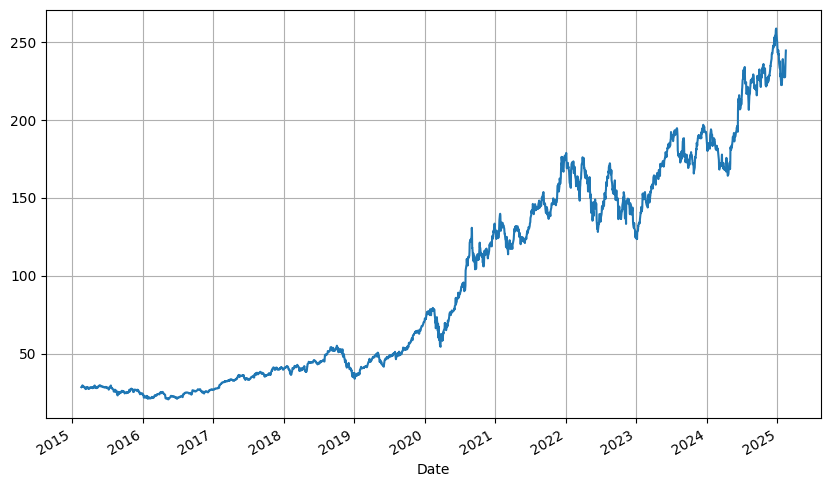

In [5]:
AAPL["Close"].plot(grid = True); # Plot the adjusted closing price of AAPL

### Plotting multiple stocks together

For a variety of reasons, we may wish to plot multiple financial instruments together including:
* we may want to compare stocks
* compare them to the market or other securities such as [exchange-traded funds (ETFs)](https://en.wikipedia.org/wiki/Exchange-traded_fund).

Here, we plot the adjusted close for several stocks together. 

In [7]:
META = yf.Ticker("META").history(start = start, end= end)
GOOG = yf.Ticker("GOOG").history(start = start, end= end)

#META = pdr.get_data_yahoo("META", start=start, end=end)
#GOOG = pdr.get_data_yahoo("GOOG", start=start, end=end)
#FB, GOOG = (web.DataReader(name=s, data_source="yahoo", start=start, end=end) for s in ["FB", "GOOG"])

# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
close = pd.DataFrame({ "AAPL": AAPL["Close"],
                           "META": META["Close"],
                           "GOOG": GOOG["Close"]})

close.tail()


,AAPL,META,GOOG
Date,,,
2025-02-10 00:00:00-05:00,227.649994,717.400024,188.199997
2025-02-11 00:00:00-05:00,232.619995,719.799988,187.070007
2025-02-12 00:00:00-05:00,236.869995,725.380005,185.429993
2025-02-13 00:00:00-05:00,241.529999,728.559998,187.880005
2025-02-14 00:00:00-05:00,244.600006,736.669983,186.869995


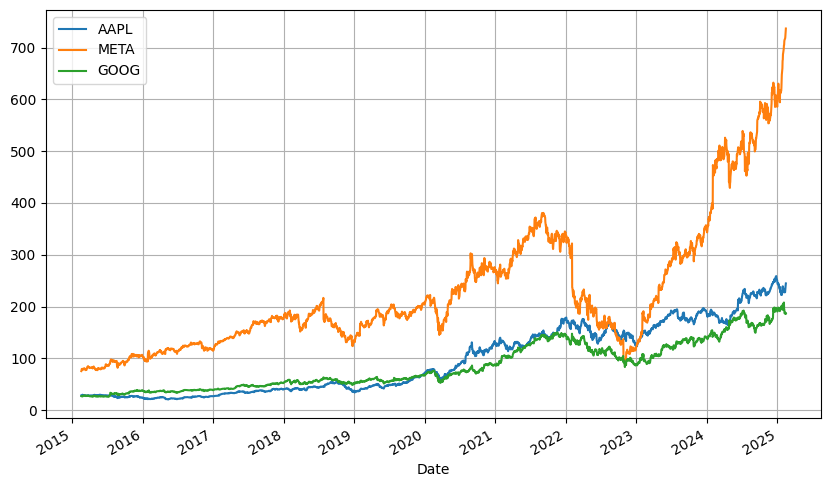

In [8]:
close.plot(grid = True);

One solution is to plot the information we actually want. One option is to plot the *stock returns since the beginning of the period of interest*:

$$
\text{return}_{t,0} = \frac{\text{price}_t}{\text{price}_0}
$$

This requires transforming the data, which we do using a *lambda function*. 

In [9]:
stock_return = close.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,META,GOOG
Date,,,
2015-02-17 00:00:00-05:00,1.000000,1.000000,1.000000
2015-02-18 00:00:00-05:00,1.006962,1.014683,0.994216
2015-02-19 00:00:00-05:00,1.004850,1.050529,1.000055
2015-02-20 00:00:00-05:00,1.013064,1.056878,0.992834
2015-02-23 00:00:00-05:00,1.040444,1.042857,0.979865


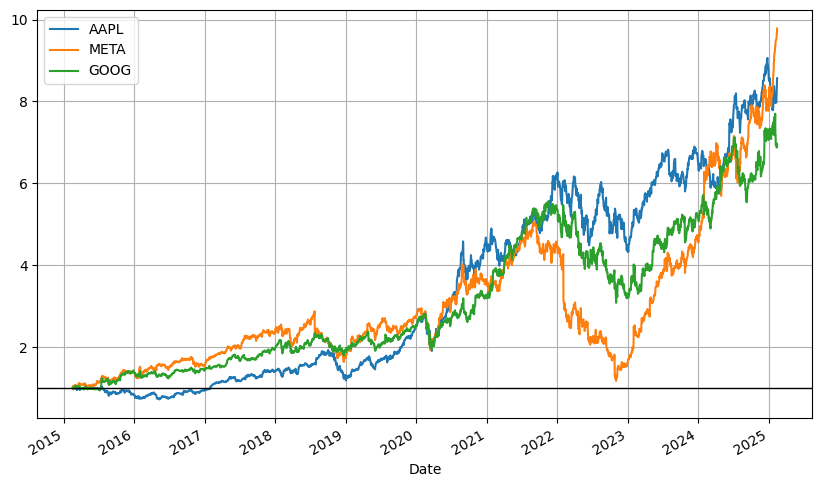

In [10]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 1);

This is a much more useful plot! Note: 
* We can now see how profitable each stock was since the beginning of the period. 
* Furthermore, we see that these stocks are highly correlated; they generally move in the same direction, a fact that was difficult to see in the other charts.

Alternatively, we could plot the change of each stock per day. One way to do so would be to use the *percentage increase of a stock*:
$$
\text{increase}_t = \frac{\text{price}_{t} - \text{price}_{t-1}}{\text{price}_{t-1}}
$$

or the *log difference*.

$$
\text{change}_t = \log\left( \frac{\text{price}_{t}}{\text{price}_{t - 1}} \right) = \log(\text{price}_{t}) - \log(\text{price}_{t - 1})
$$

Here, $\log$ is the natural log. Log difference has a desirable property: the sum of the log differences can be interpreted as the total change (as a percentage) over the period summed. Log differences also more cleanly correspond to how stock prices are modeled in continuous time.

Note also the transformations we discussed in class (box-cox transformation).

We can obtain and plot the log differences of the data as follows.

In [11]:
stock_change = close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,META,GOOG
Date,,,
2015-02-17 00:00:00-05:00,NaN,NaN,NaN
2015-02-18 00:00:00-05:00,0.006938,0.014576,-0.005801
2015-02-19 00:00:00-05:00,-0.002100,0.034718,0.005856
2015-02-20 00:00:00-05:00,0.008141,0.006026,-0.007247
2015-02-23 00:00:00-05:00,0.026668,-0.013356,-0.013148


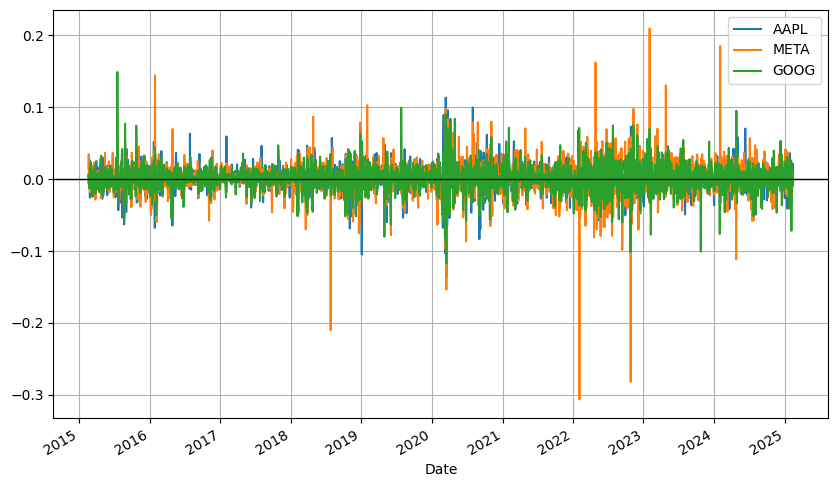

In [12]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 1);

**QUESTION**:

Would you opt for the plot stock return or log difference? In which cases you would go for one or the other?

### Comparing stocks to the overall market 

We often want to compare the performance of stocks to the performance of the overall market. 
[SPY](https://finance.yahoo.com/quote/SPY/) is the ticker symbol for the SPDR S&P 500 exchange-traded mutual fund (ETF), which is a fund that has roughly the stocks in the [S&P 500 stock index](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC). 
This serves as one measure for the overal market.

In [13]:
SPY = yf.Ticker("SPY").history(start = start, end= end)
#SPY = pdr.get_data_yahoo("SPY", start=start, end=end)
SPY.tail()
close['SPY'] = SPY["Close"]
close.head()

,AAPL,META,GOOG,SPY
Date,,,,
2015-02-17 00:00:00-05:00,28.547977,75.312309,26.970778,176.524826
2015-02-18 00:00:00-05:00,28.746742,76.418091,26.814770,176.541611
2015-02-19 00:00:00-05:00,28.686436,79.117775,26.972267,176.415512
2015-02-20 00:00:00-05:00,28.920937,79.595955,26.777504,177.474213
2015-02-23 00:00:00-05:00,29.702578,78.539978,26.427725,177.449020


In [14]:
stock_return['SPY'] = close[['SPY']].apply(lambda x: x / x[0])
stock_return.head()

,AAPL,META,GOOG,SPY
Date,,,,
2015-02-17 00:00:00-05:00,1.000000,1.000000,1.000000,1.000000
2015-02-18 00:00:00-05:00,1.006962,1.014683,0.994216,1.000095
2015-02-19 00:00:00-05:00,1.004850,1.050529,1.000055,0.999381
2015-02-20 00:00:00-05:00,1.013064,1.056878,0.992834,1.005378
2015-02-23 00:00:00-05:00,1.040444,1.042857,0.979865,1.005235


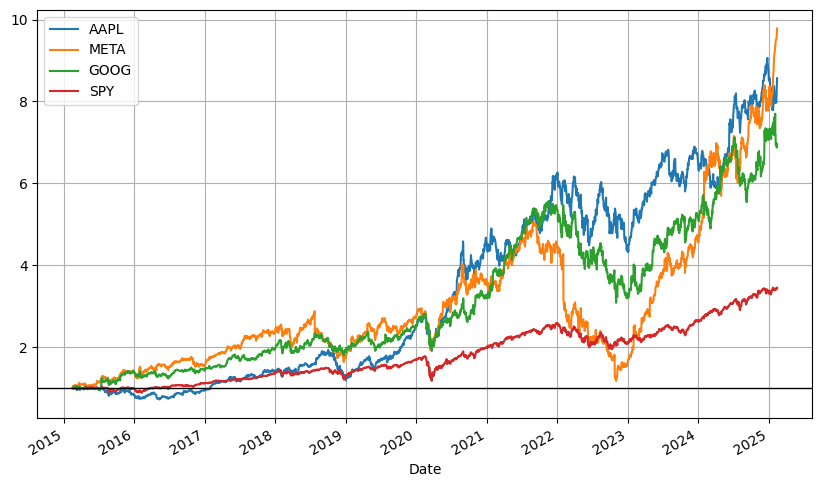

In [15]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 1);

In [16]:
stock_change['SPY'] = close[['SPY']].apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,META,GOOG,SPY
Date,,,,
2015-02-17 00:00:00-05:00,NaN,NaN,NaN,NaN
2015-02-18 00:00:00-05:00,0.006938,0.014576,-0.005801,0.000095
2015-02-19 00:00:00-05:00,-0.002100,0.034718,0.005856,-0.000715
2015-02-20 00:00:00-05:00,0.008141,0.006026,-0.007247,0.005983
2015-02-23 00:00:00-05:00,0.026668,-0.013356,-0.013148,-0.000142


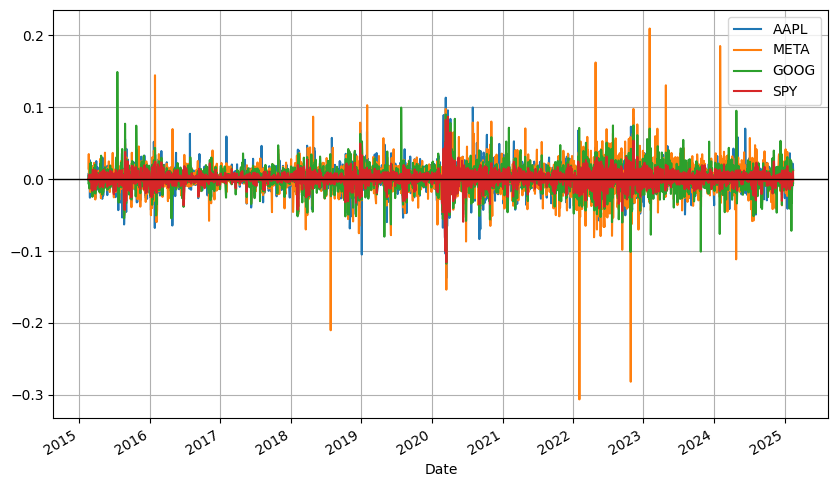

In [17]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 1);

### Moving Averages

In class we discussed the idea of moving averages. Here we repeat it:

For a time series $x_t$, the *$q$-day moving average at time $t$*, denoted $MA^q_t$, is the average of $x_t$ over the past $q$ days, 
$$
MA^q_t = \frac{1}{q} \sum_{i = 0}^{q-1} x_{t - i}
$$

The [`rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) function in Pandas provides functionality for computing moving averages. We'll use it to create a 20-day moving average for Apple stock data and plot it alongside the stock price. 

In [18]:
AAPL["20d"] = AAPL["Close"].rolling(window = 20, center = False).mean()
AAPL.head(30)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,20d
Date,,,,,,,,
2015-02-17 00:00:00-05:00,28.472045,28.782472,28.344748,28.547977,252609600,0.0,0.0,NaN
2015-02-18 00:00:00-05:00,28.503314,28.760141,28.463115,28.746742,179566800,0.0,0.0,NaN
2015-02-19 00:00:00-05:00,28.693135,28.815966,28.659637,28.686436,149449600,0.0,0.0,NaN
2015-02-20 00:00:00-05:00,28.724407,28.920937,28.597112,28.920937,195793600,0.0,0.0,NaN
2015-02-23 00:00:00-05:00,29.037062,29.702578,28.956664,29.702578,283896400,0.0,0.0,NaN
2015-02-24 00:00:00-05:00,29.689190,29.836588,29.293899,29.517227,276912400,0.0,0.0,NaN
2015-02-25 00:00:00-05:00,29.380982,29.389917,28.619434,28.762363,298846800,0.0,0.0,NaN
2015-02-26 00:00:00-05:00,28.762369,29.226891,28.275516,29.126394,365150000,0.0,0.0,NaN
2015-02-27 00:00:00-05:00,29.032600,29.159898,28.639544,28.688677,248059200,0.0,0.0,NaN


Notice how late the rolling average begins. It cannot be computed until twenty days have passed. Note that this becomes more severe for slower moving averages. 

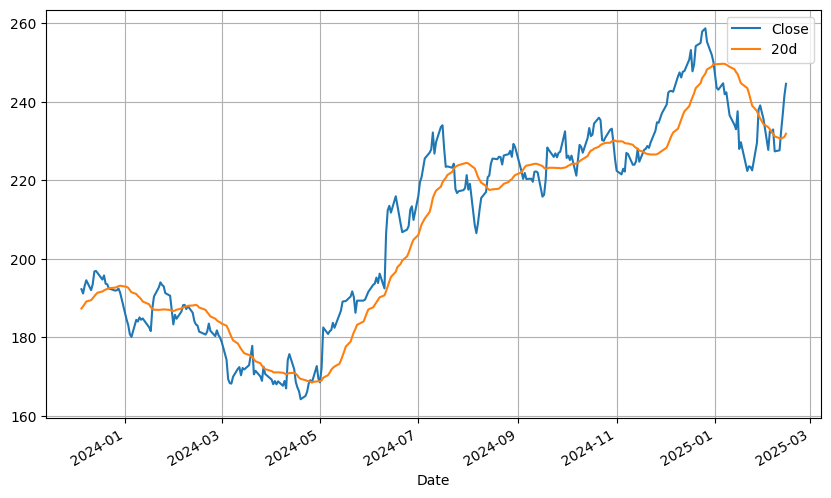

In [19]:
AAPL[["Close", "20d"]].tail(300).plot(grid = True); 

Notice that the moving averages "smooths" the time series. This can sometimes make it easier to identify trends. The larger $q$, the less responsive a moving average is to fast fluctuations in the series $x_t$. 
So, if these fast fluctuations are considered "noise", a moving average will identify the "signal". 
* *Fast moving averages* have smaller $q$ and more closely follow the time series. 
* *Slow moving averages* have larger $q$ and respond less to the fluctuations of the stock.

Let's compare the 20-day, 50-day, and 200-day moving averages.


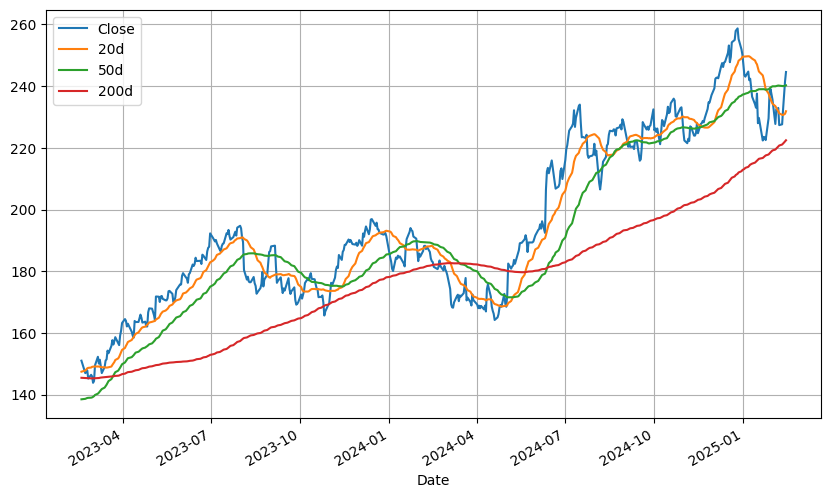

In [20]:
AAPL["50d"] = AAPL["Close"].rolling(window = 50, center = False).mean()
AAPL["200d"] = AAPL["Close"].rolling(window = 200, center = False).mean()

AAPL[["Close", "20d", "50d", "200d"]].tail(500).plot(grid = True); 

The 20-day moving average is the most sensitive to fluctuations, while the 200-day moving average is the least sensitive. 

### Trading strategies and backtesting 


**Trading** is the practice of buying and selling financial assets for the purpose of making a profit. Traders develop **trading strategies** that a computer can use to make trades. Sometimes, these can be very complicated (esp. when they employ exogenous factors and data like [Twitter](https://www.theatlantic.com/technology/archive/2011/03/does-anne-hathaway-news-drive-berkshire-hathaways-stock/72661/), but other times traders make decisions based on finding patterns or trends in charts. 

One example is called the [moving average crossover strategy](http://www.investopedia.com/university/movingaverage/movingaverages4.asp). 
This strategy is based on two moving averages, a "fast" one and a "slow" one. The strategy is:

* Trade the asset when the fast moving average crosses over the slow moving average.
* Exit the trade when the fast moving average crosses over the slow moving average again.

A trade will be prompted when the fast moving average crosses from below to above the slow moving average, and the trade will be exited when the fast moving average crosses below the slow moving average later.

This is the outline of a complete strategy and we already have the tools to get a computer to automatically implement the strategy.

But before we decide if we want to use it, we should first evaluate the quality of the strategy. The usual means for doing this is called **backtesting**, which is looking at how profitable the strategy is on historical data. 

You could now write python code that could implement and backtest a trading strategy. There are also lots of python packages for this:  
* [**pyfolio**](https://quantopian.github.io/pyfolio/) (for analytics)
* [**zipline**](http://www.zipline.io/beginner-tutorial.html) (for backtesting and algorithmic trading), and 
* [**backtrader**](https://www.backtrader.com/) (also for backtesting and trading). 




**QUESTION**:

Use the plot above (assuming that our 20-day moving average is the slow moving one and the 50-day moving average is the fast moving one) and based on the strategy we described above, determine when you should have bought (and also sold) Apple stock?

# Part 2: A forecasting problem

We will now apply some forecasting algorithms on a real dataset, namely the Berkeley Earth Surface Temperature Study. Dataset can be fount on [Berkeley Earth data](http://berkeleyearth.org/data/) page and combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In [23]:
# import necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from itertools import product
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

# Dataset Exploration

In [24]:
data = pd.read_csv('data/GlobalLandTemperaturesByMajorCity.csv')

In [25]:
# show first few records
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [26]:
# show a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


# Preprocessing, Advanced Visualisation and Stationarity

Let's isolate Toronto and consider the data of this city to be our dataset. The target is the AverageTemperature column, that is the Average Temperature for that specific month. We have data from 1743 to 2013.

In [27]:
toronto_data = data[data['City'] == 'Toronto']

In [28]:
toronto_data.head(7)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
229690,1743-11-01,-0.106,1.905,Toronto,Canada,44.20N,80.50W
229691,1743-12-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229692,1744-01-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229693,1744-02-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229694,1744-03-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229695,1744-04-01,5.892,2.249,Toronto,Canada,44.20N,80.50W
229696,1744-05-01,12.050,1.830,Toronto,Canada,44.20N,80.50W


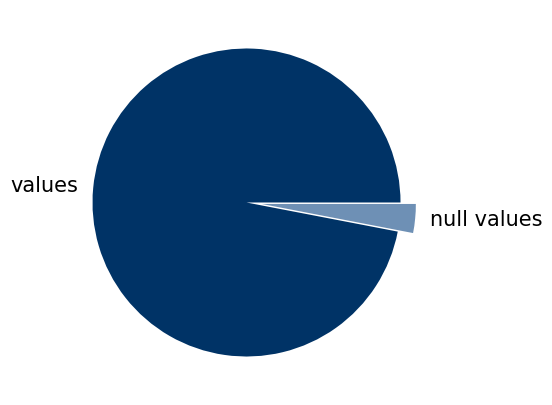

In [29]:
# display NaN values with a pie chart
plt.figure(figsize = (5, 5))
explodes = (0, 0.1)
plt.pie(data[data['City'] == 'Toronto'].AverageTemperature.isna().value_counts(),
        explode = explodes,
        startangle = 0,
        colors = ['#003366', '#6E90B5'],
        labels = ['values', 'null values'],
        textprops = {'fontsize': 15});

Let's fill the missing values with the previous ones.

In [30]:
toronto_data['AverageTemperature'] = toronto_data.AverageTemperature.fillna(method = 'bfill')
toronto_data['AverageTemperatureUncertainty'] = toronto_data.AverageTemperatureUncertainty.fillna(method = 'bfill')

In [31]:
# check missing values
toronto_data.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
229690,1743-11-01,-0.106,1.905,Toronto,Canada,44.20N,80.50W
229691,1743-12-01,5.892,2.249,Toronto,Canada,44.20N,80.50W
229692,1744-01-01,5.892,2.249,Toronto,Canada,44.20N,80.50W
229693,1744-02-01,5.892,2.249,Toronto,Canada,44.20N,80.50W
229694,1744-03-01,5.892,2.249,Toronto,Canada,44.20N,80.50W


The 'dt' column identifies the year and the month. It is better to convert this column into a datetime object and to explicitly identify the year and the month in two different columns.

In [32]:
toronto_data = toronto_data.reset_index()
toronto_data = toronto_data.drop(columns = ['index'])
toronto_data.dt = pd.to_datetime(toronto_data.dt)

In [33]:
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(toronto_data)):
    WEEKDAY.append(toronto_data.dt[i].weekday())
    DAY.append(toronto_data.dt[i].day)
    MONTH.append(toronto_data.dt[i].month)
    YEAR.append(toronto_data.dt[i].year)

In [34]:
toronto_data['Year'] = YEAR
toronto_data['Month'] = MONTH
toronto_data['Day'] = DAY 
toronto_data['Weekday'] = WEEKDAY

In [35]:
change_year_index = []
change_year = []
year_list = toronto_data['Year'].tolist()
for year in range(0, len(year_list) - 1):
    if year_list[year] != year_list[year + 1]:
        change_year.append(year_list[year + 1])
        change_year_index.append(year + 1)

In [36]:
toronto_data.loc[change_year_index].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day,Weekday
2,1744-01-01,5.892,2.249,Toronto,Canada,44.20N,80.50W,1744,1,1,2
14,1745-01-01,-7.625,2.182,Toronto,Canada,44.20N,80.50W,1745,1,1,4
26,1746-01-01,-8.613,2.057,Toronto,Canada,44.20N,80.50W,1746,1,1,5
38,1747-01-01,-8.613,2.057,Toronto,Canada,44.20N,80.50W,1747,1,1,6
50,1748-01-01,-8.613,2.057,Toronto,Canada,44.20N,80.50W,1748,1,1,0


Here we can describe three functions:
1. __get_timeseries(start_year,end_year)__:  extracts the portion of the dataset between the two years 
1. __plot_timeseries(start_year,end_year)__:  plots the timeseries extracted in get_timeseries in a readable way
1. __plot_from_data(data, time, display_options)__:  plots the data (AverageTemperature) wrt the time (dt) in a readable way. The display options permit to display the ticks, change the colors, set the label


In [37]:
# last_year_data = toronto_data[toronto_data.Year >= 2010].reset_index().drop(columns = ['index'])
# P = np.linspace(0,len(last_year_data)-1,5).astype(int)

In [38]:
def get_timeseries(start_year,end_year):
    last_year_data = toronto_data[(toronto_data.Year >= start_year) & (toronto_data.Year <= end_year)].reset_index().drop(columns = ['index'])
    return last_year_data

In [39]:
def plot_timeseries(start_year,end_year):
    last_year_data = get_timeseries(start_year,end_year)
    P = np.linspace(0, len(last_year_data) - 1, 5).astype(int)
    plt.plot(last_year_data.AverageTemperature, marker = '.', color = '#003366')
    plt.xticks(np.arange(0, len(last_year_data), 1)[P], last_year_data.dt.loc[P])
    plt.xlabel('Date (Y/M/D)')
    plt.ylabel('Average Temperature')

In [40]:
#modified
def plot_from_data(df, time_col, c='#003366', with_ticks=True, label=None):
    # Plot the DataFrame directly using the pandas plot method
    # This will automatically use the time column for the x-axis and the data column for the y-axis
    ax = df.plot(x=time_col, y=df.values, marker='.', color=c, label=label, figsize=(12, 7))
    
#    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    # Handle x-ticks to avoid overlap
    if with_ticks:
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.set_xlabel('Date (Y/M/D)')
    ax.set_ylabel('Average Temperature')

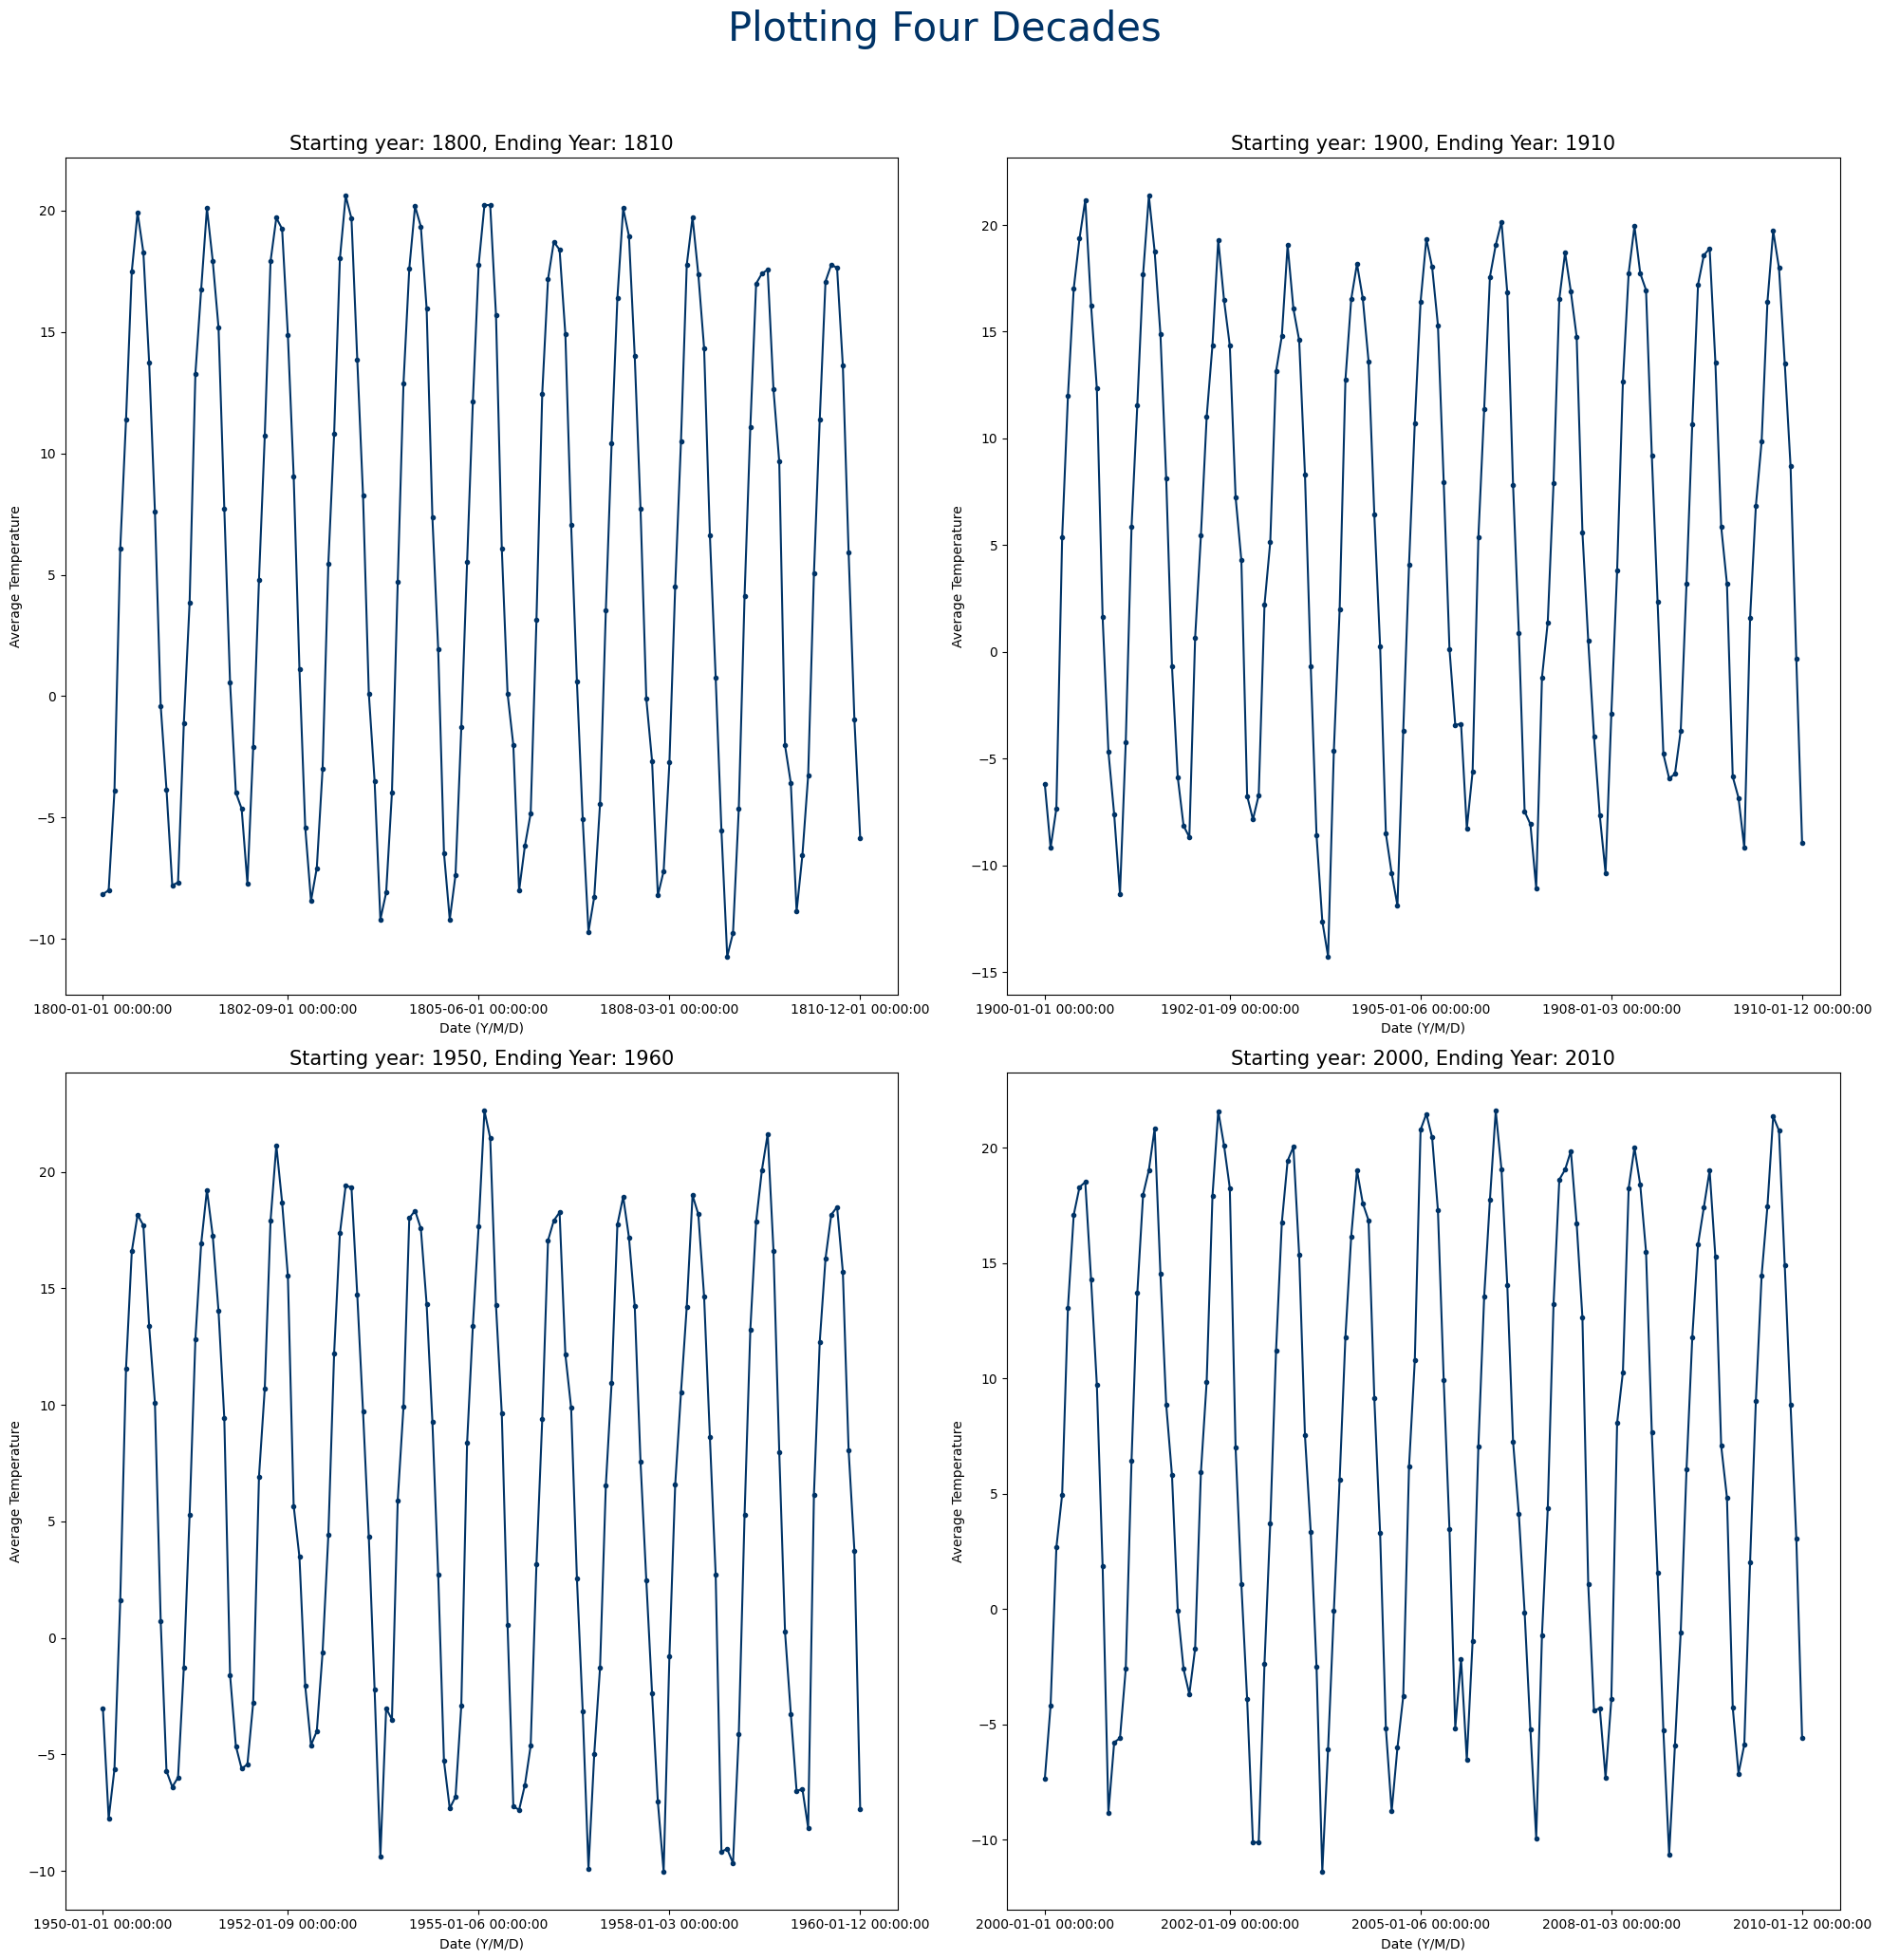

In [41]:
plt.figure(figsize = (20, 20))
# plt.title(figure_title, )
plt.suptitle('Plotting Four Decades', fontsize = 30, color = '#003366', y = 1.03)
plt.subplot(2, 2, 1)
plt.title('Starting year: 1800, Ending Year: 1810', fontsize = 15)
plot_timeseries(1800, 1810)
plt.subplot(2, 2, 2)
plt.title('Starting year: 1900, Ending Year: 1910', fontsize = 15)
plot_timeseries(1900, 1910)
plt.subplot(2, 2, 3)
plt.title('Starting year: 1950, Ending Year: 1960', fontsize = 15)
plot_timeseries(1950, 1960)
plt.subplot(2, 2, 4)
plt.title('Starting year: 2000, Ending Year: 2010', fontsize = 15)
plot_timeseries(2000, 2010)
plt.tight_layout();

When we use ARIMA models, we should be considering stationary time series. In order to check if the timeseries we are considering is stationary, we can check the correlation and autocorrelation plots.

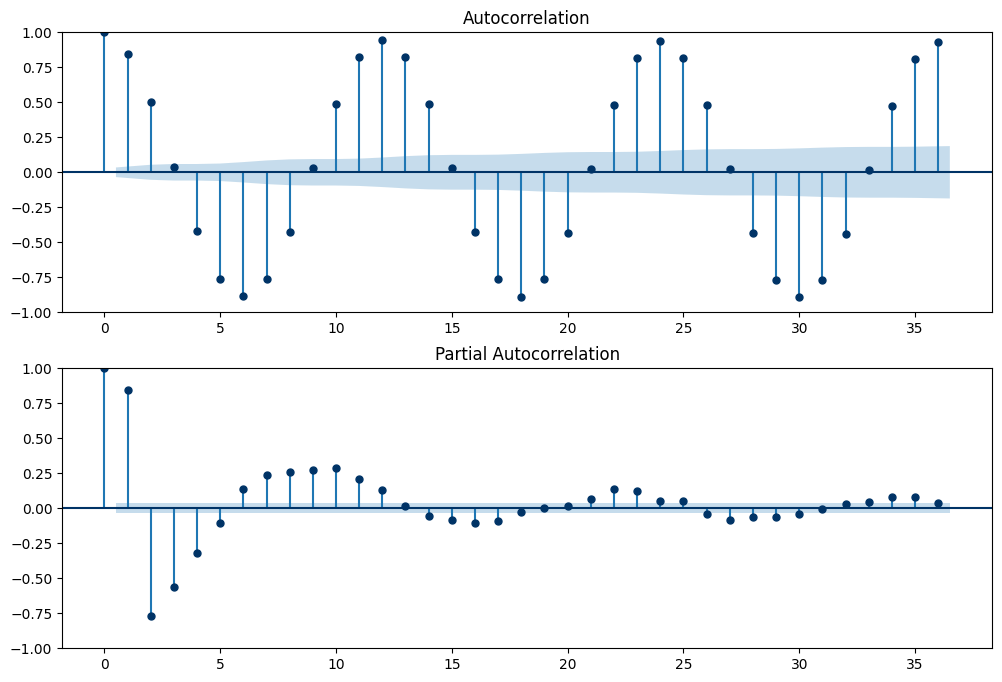

In [42]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(toronto_data.AverageTemperature, ax = ax1, color = '#003366')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(toronto_data.AverageTemperature, ax = ax2, color = '#003366')

So the timeseries is not stationary. Nonetheless, if we perform the AD Fuller Test on the entire dataset it tells us that the dataset is stationary.

In [43]:
result = adfuller(toronto_data.AverageTemperature)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -6.7440318656952885
p-value: 3.0672478743199015e-09
Critical Values:
	1%: -3.4323894324171813
	5%: -2.8624410979440333
	10%: -2.567249674462629


But it's true just because we are looking at the entire dataset. In fact, if we analyse a single decade, it is clear that the dataset is absolutely not stationary for the decade period of time.

In [44]:
result = adfuller(toronto_data.AverageTemperature[0:120])
print('ADF Statistic on the first decade: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the first decade: -2.1098135754789684
p-value: 0.24058686758129233
Critical Values:
	1%: -3.489589552580676
	5%: -2.887477210140433
	10%: -2.580604145195395


In order to take account of this non-stationarity, a differentiation term will be considered in the ARIMA models.

# Machine Learning Algorithms

Let's consider the 1992–2013 decade and plot it.

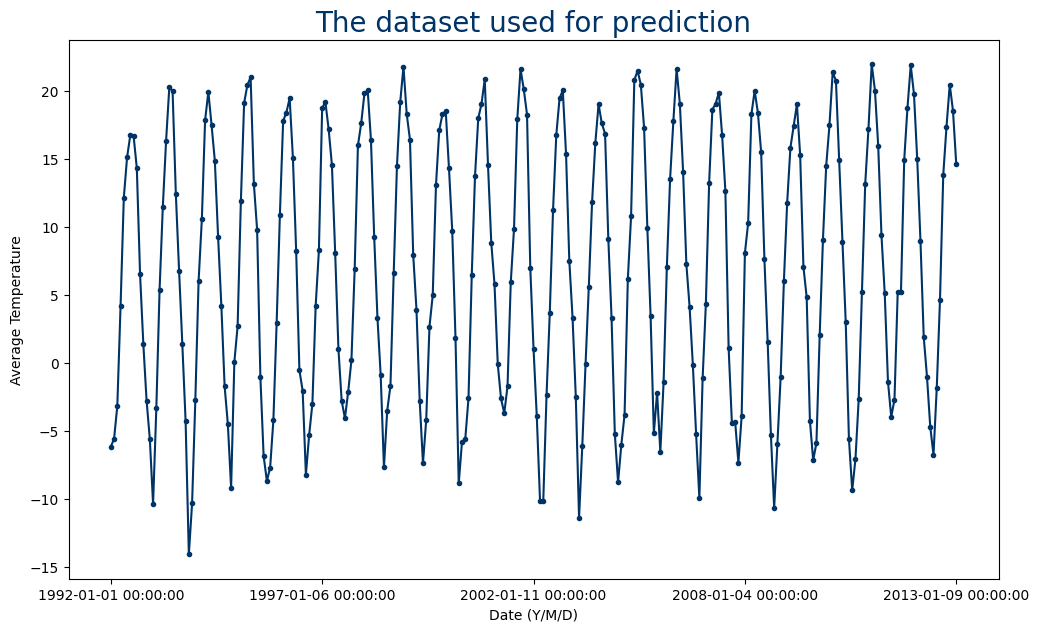

In [45]:
plt.figure(figsize = (12, 7))
plt.title('The dataset used for prediction', fontsize = 20, color = '#003366')
plot_timeseries(1992, 2013)

In [46]:
# perform the train/test split.
temp = get_timeseries(1992, 2013)
N = len(temp.AverageTemperature)
split = 0.95
training_size = round(split * N)
print(training_size)
test_size = round((1 - split) * N)
print(test_size)
series = temp.AverageTemperature[ : training_size]
date = temp.dt[:training_size]
series_df = pd.Series(series.values,index=date)

# Test data (last 5%)
test_series = temp.AverageTemperature[training_size:]
test_date = pd.to_datetime(temp.dt[training_size:])
test_series_df = pd.Series(test_series.values, index=test_date)

248
13


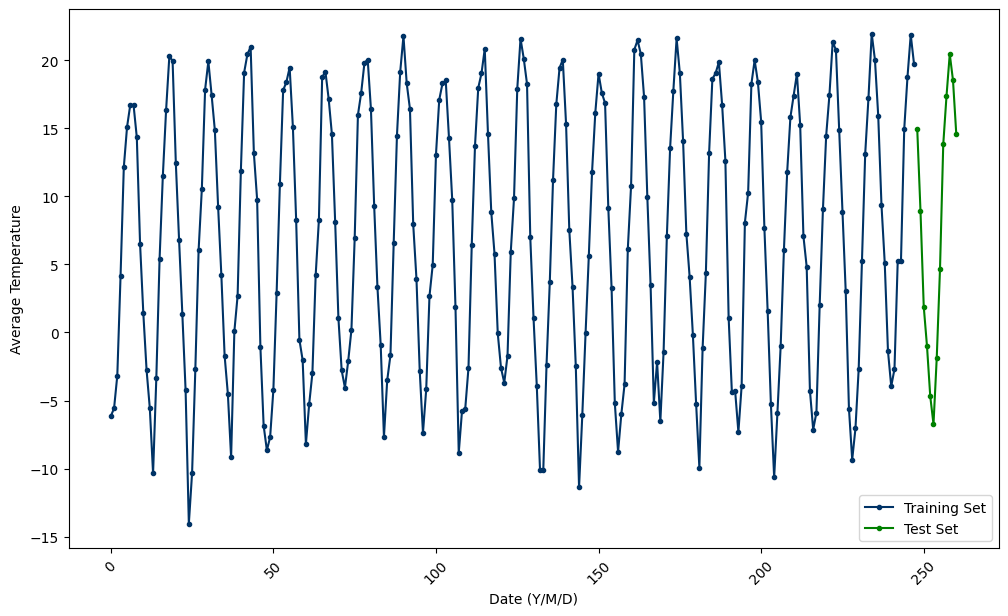

In [47]:
# plot the split
plt.figure(figsize = (12, 7))
plot_from_data(series, date, label = 'Training Set')
plot_from_data(test_series, test_date, 'green', with_ticks = True, label = 'Test Set')
plt.legend();

In [48]:
test_series = temp.AverageTemperature[len(date)-1 : len(temp)]
test_date = temp.dt[len(date)-1 : len(temp)]

The machine learning algorithm we gonna apply are the ARIMA models. These are based on an optimisation procedure that adopts the Maximum Likelihood function.

In [70]:
def optimize_ARIMA(order_list, exog):
    """
    Optimize ARIMA model by testing different (p, d, q) orders and returning a dataframe
    with the corresponding Akaike Information Criterion (AIC) scores.

    Parameters:
        order_list (list of tuples): List of (p, d, q) tuples to evaluate.
        exog (array-like): Exogenous variable for the ARIMA model.

    Returns:
        pd.DataFrame: DataFrame containing (p, d, q) orders and their respective AIC scores,
                      sorted in ascending order (lower AIC is better).
    """
    
    results = []  # Store model results as (order, AIC) pairs
    
    for order in tqdm(order_list):  # Iterate through each (p, d, q) combination
        try:
            # Fit the ARIMA model with the given order
            model = SARIMAX(exog, order=order).fit(disp=-1)
            
            # Get the AIC value for model evaluation
            aic = model.aic  
            
            # Store results as a list of tuples
            results.append([order, aic])
            
            # Convert results into a DataFrame
            result_df = pd.DataFrame(results, columns=['(p, d, q)', 'AIC'])
            
            # Sort results by AIC in ascending order (lower is better)
            result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
        
        except Exception as e:
            # Handle cases where a model fails to fit
            print(f"Skipping order {order} due to error: {e}")
        
        continue  # Continue iterating even if an exception occurs
    
    return result_df  # Return the sorted DataFrame of results

The zero-differentiated ARIMA models are considered and evaluated using the AIC.

In [71]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series)

  0%|          | 0/100 [00:00<?, ?it/s]

In [72]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(6, 0, 8)",1054.226169
1,"(3, 0, 3)",1055.650875
2,"(3, 0, 6)",1057.085322
3,"(4, 0, 8)",1058.340701
4,"(4, 0, 7)",1058.422902


While the first-differentiated models are considered by using these lines:

In [73]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = series)

  0%|          | 0/100 [00:00<?, ?it/s]

The total summary is highlighted with this function and it shows that the (2,1,9) model and the (2,1,4) model are the best ones.

In [74]:
result_d_1.head()

,"(p, d, q)",AIC
0,"(2, 1, 6)",1051.276348
1,"(2, 1, 4)",1051.776086
2,"(2, 1, 5)",1051.857240
3,"(2, 1, 9)",1051.903393
4,"(7, 1, 7)",1053.410401


As it is possible to see the statistical summary values are almost identical.

In [75]:
final_result = result_d_0.append(result_d_1)
best_models = final_result.sort_values(by = 'AIC', ascending = True).reset_index(drop = True).head()
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_params_1 = best_models[best_models.columns[0]][1]

In [76]:
best_model_0 = SARIMAX(series, order = best_model_params_0).fit()
print(best_model_0.summary())
best_model_1 = SARIMAX(series, order = best_model_params_1).fit()
print(best_model_1.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73626D+00    |proj g|=  5.96288D+00

At iterate    5    f=  2.36203D+00    |proj g|=  1.07066D-01

At iterate   10    f=  2.25951D+00    |proj g|=  9.86936D-02

At iterate   15    f=  2.16817D+00    |proj g|=  1.33270D-01

At iterate   20    f=  2.13338D+00    |proj g|=  6.53776D-02

At iterate   25    f=  2.11841D+00    |proj g|=  4.14777D-02

At iterate   30    f=  2.09787D+00    |proj g|=  1.01251D-01

At iterate   35    f=  2.09452D+00    |proj g|=  1.68777D-01

At iterate   40    f=  2.09210D+00    |proj g|=  3.51515D-01

At iterate   45    f=  2.08449D+00    |proj g|=  2.40190D-01

At iterate   50    f=  2.08322D+00    |proj g|=  3.76941D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   35    f=  2.09807D+00    |proj g|=  2.53877D-01

At iterate   40    f=  2.09330D+00    |proj g|=  3.00240D-01

At iterate   45    f=  2.09237D+00    |proj g|=  2.20850D-01

At iterate   50    f=  2.09229D+00    |proj g|=  6.06709D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   6.067D-02   2.092D+00
  F =   2.0922904964110285     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  248
Model:           

And the same thing happens between the statistical plots:<br>
- __Model (2, 1, 9)__

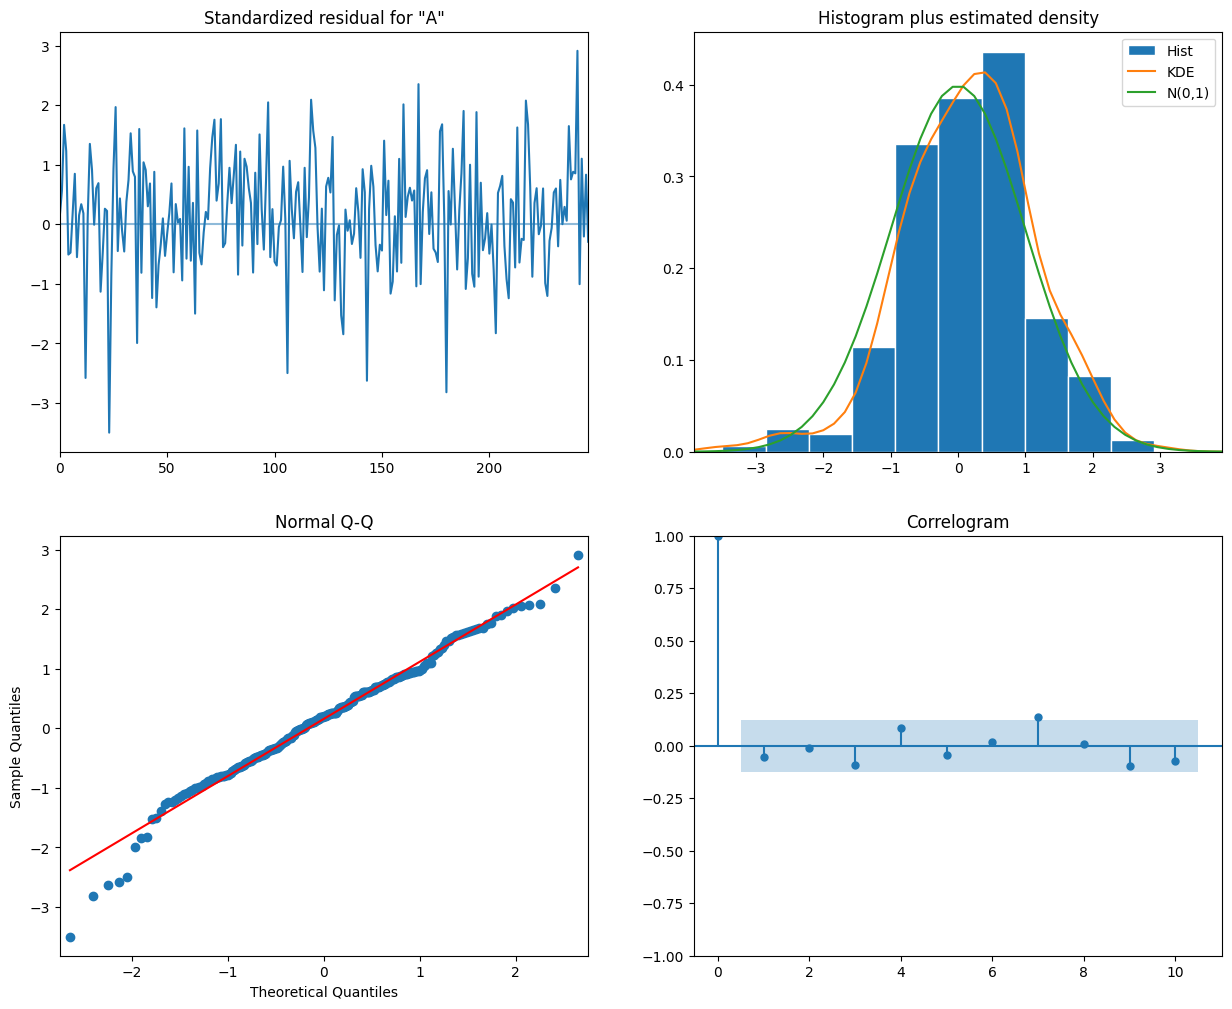

In [77]:
best_model_0.plot_diagnostics(figsize = (15, 12))
plt.show()

- __Model (2, 1, 4)__

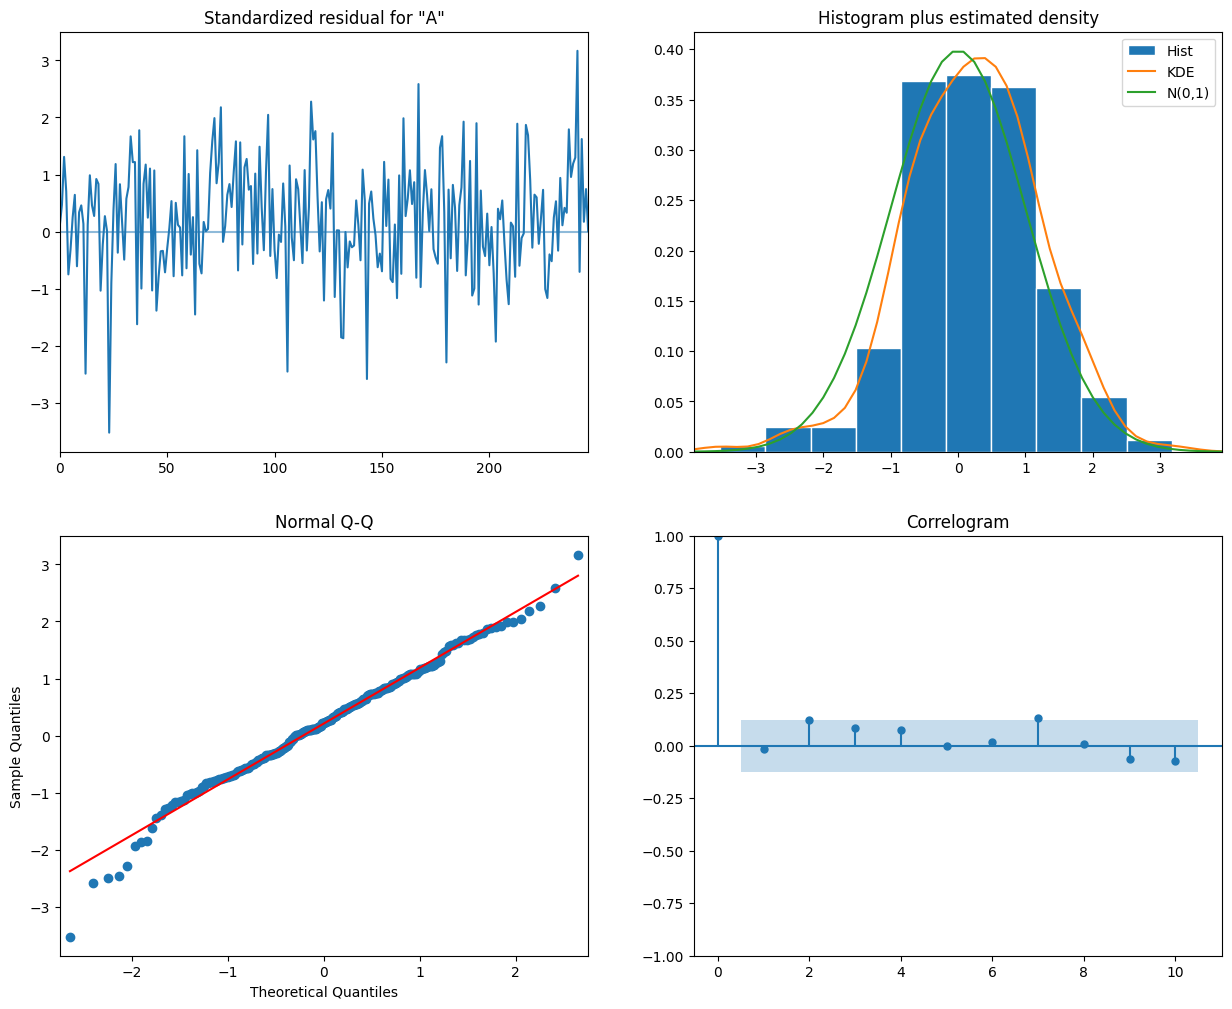

In [78]:
best_model_1.plot_diagnostics(figsize = (15, 12))
plt.show()

Nonetheless, it is preferable to use low index models both to avoid overfitting and reduce the computational stress on your computer. For this reason, the __(2, 1, 9)__ model has been considered.

# Forecasting

Let's plot the results of the forecasting operation:

In [87]:
fore_l= test_size-1
forecast = best_model_0.get_prediction(start = training_size, end = training_size + fore_l)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha = 0.05)

s_forecast = best_model_1.get_prediction(start = training_size, end = training_size + fore_l)
s_forec = s_forecast.predicted_mean
s_ci = s_forecast.conf_int(alpha = 0.05)

In [88]:
test_series = temp.AverageTemperature[len(date)-1 : len(temp)]
error_test = toronto_data.loc[test_date[1:].index.tolist()].AverageTemperatureUncertainty
index_test = test_date[1:].index.tolist()
test_set = test_series[1:]
lower_test = test_set - error_test
upper_test = test_set + error_test

In [89]:
x0 = toronto_data.AverageTemperature.index[0 : training_size]
x1 = toronto_data.AverageTemperature.index[training_size : training_size + fore_l + 1]

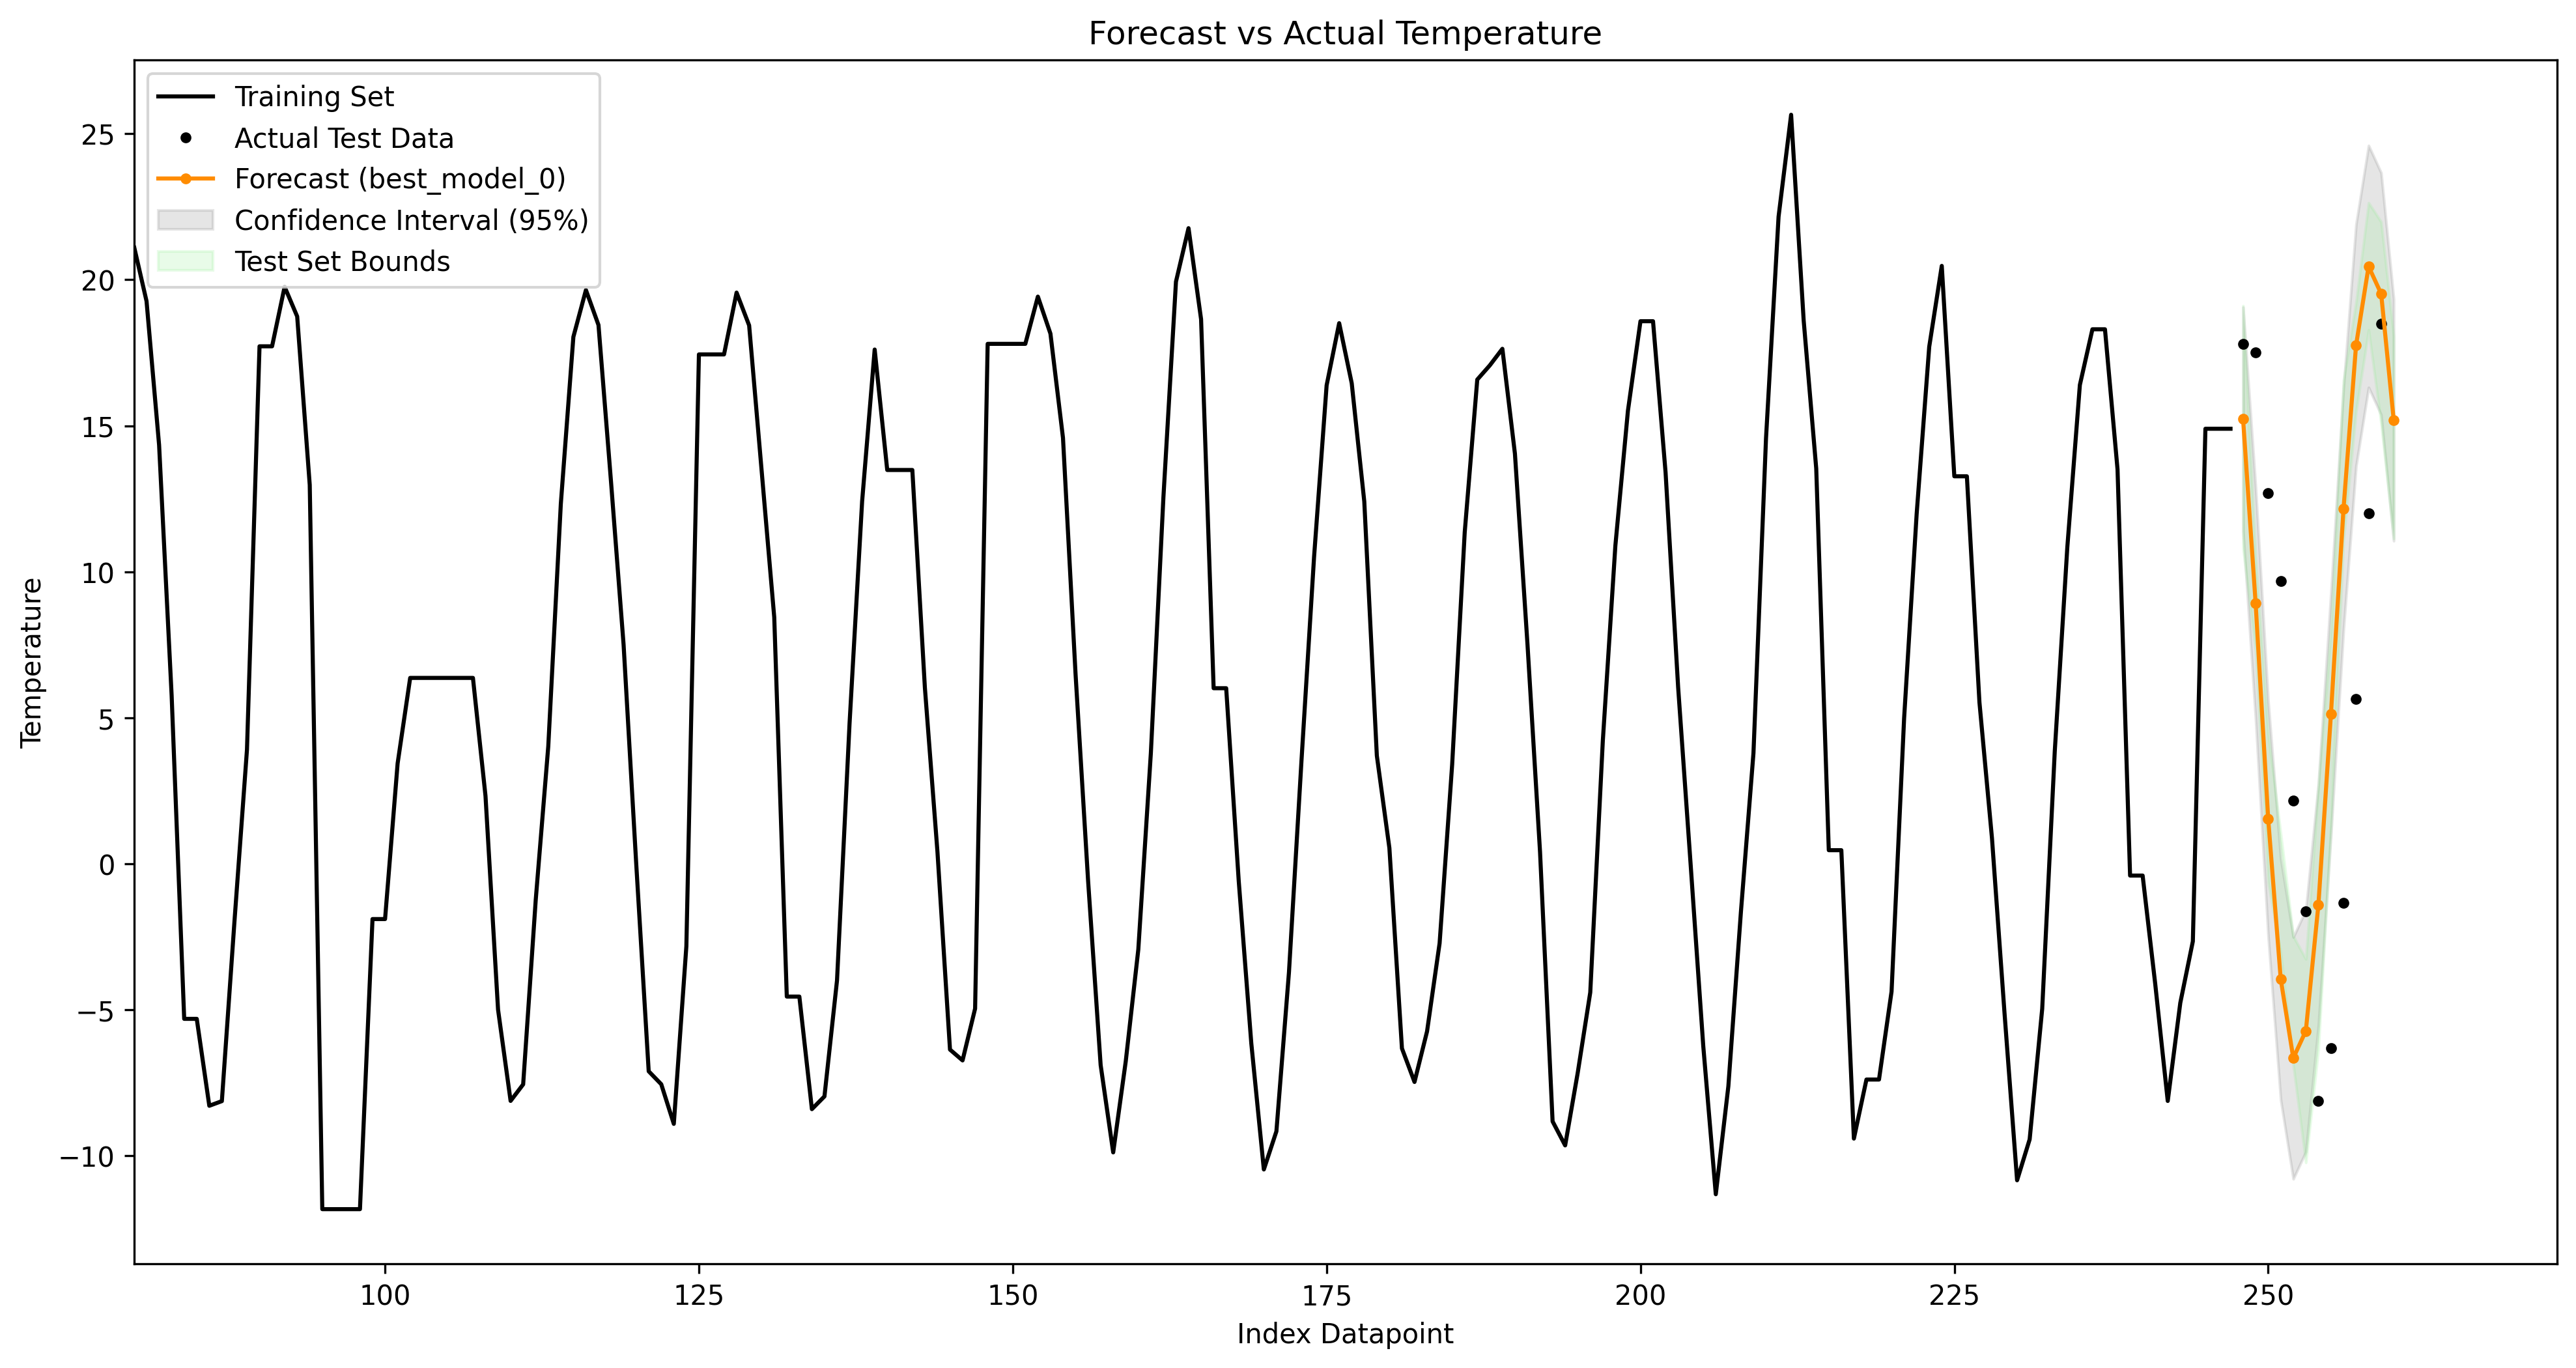

In [90]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=300)

# Plot training data
plt.plot(x0, toronto_data.AverageTemperature[0:training_size], 'k', label='Training Set')

# Plot actual test data
plt.plot(toronto_data.AverageTemperature[training_size:training_size + fore_l], '.k', label='Actual Test Data')

# Plot forecast directly from forec
ax.plot(x1, forec, color='Darkorange', label='Forecast (best_model_0)', marker='.')
ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'], 
                alpha=0.2, label='Confidence Interval (95%)', color='grey')

# Plot lower and upper bounds for the test set
ax.fill_between(x1, lower_test, upper_test, alpha=0.2, label='Test Set Bounds', color='lightgreen')

# Add legend, labels, and title
plt.legend(loc='upper left')
plt.xlim(80,)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.title('Forecast vs Actual Temperature')
plt.show()


And now let's consider the specific predicted zone with the correspondent Uncertainty (the one given by the dataset) and the confidence interval (given by the algorithm):

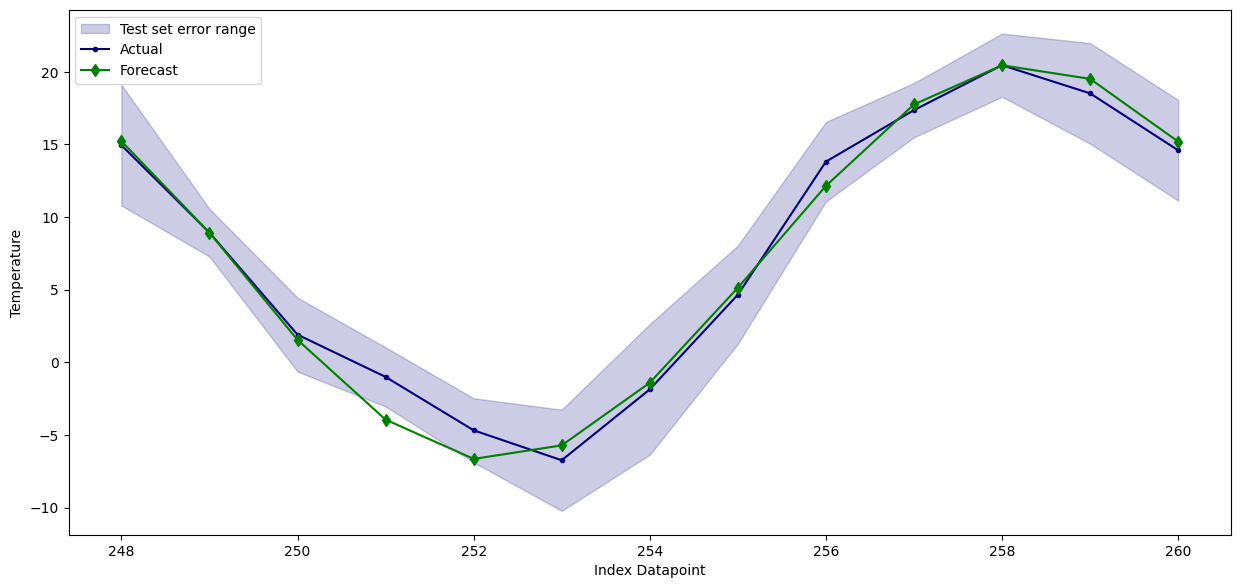

In [91]:
plt.figure(figsize = (15, 15))
plt.subplot(2, 1, 1)
plt.fill_between(x1, lower_test, upper_test, alpha = 0.2, label = 'Test set error range', color = 'navy')
plt.plot(test_set, marker = '.', label = 'Actual', color = 'navy')
plt.plot(forec, marker = 'd', label = 'Forecast', color = 'green')
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
#plt.fill_between(x1, s_ci['lower AverageTemperature'], s_ci['upper AverageTemperature'],alpha=0.3, label = 'Confidence inerval (95%)',color='firebrick')
plt.legend()
#plt.subplot(2, 1, 2)
#plt.fill_between(x1, lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
#plt.plot(test_set, marker = '.', label = 'Actual', color = 'navy')
#plt.plot(s_forec, marker = 'd', label = 'Forecast', color = 'firebrick')
#plt.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'], alpha = 0.3, label = 'Confidence inerval (95%)', color = 'firebrick')
plt.legend()
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature');

Finally, let's consider a more readable version of the plot:

In [63]:
#mis-match on test_date to look into
test_date_trimmed=test_date[:-1]

In [64]:
forec_df = pd.Series(forec.values, index=test_date_trimmed)
test_set_df = pd.Series(test_set.values, index=test_date_trimmed)
#test_date_trimmed = test_date_trimmed.dt.strftime('%Y-%m-%d')

print(forec_df)
print(test_set_df)
print(test_date_trimmed)

dt
2012-01-08    15.230790
2012-01-09     8.928839
2012-01-10     1.548931
2012-01-11    -3.946274
2012-01-12    -6.649280
2013-01-01    -5.719102
2013-01-02    -1.405234
2013-01-03     5.135719
2013-01-04    12.150138
2013-01-05    17.757537
2013-01-06    20.454696
2013-01-07    19.518644
2013-01-08    15.200448
dtype: float64
dt
2012-01-08    14.955
2012-01-09     8.930
2012-01-10     1.907
2012-01-11    -1.003
2012-01-12    -4.681
2013-01-01    -6.743
2013-01-02    -1.862
2013-01-03     4.657
2013-01-04    13.818
2013-01-05    17.367
2013-01-06    20.460
2013-01-07    18.520
2013-01-08    14.599
dtype: float64
247   2012-01-08
248   2012-01-09
249   2012-01-10
250   2012-01-11
251   2012-01-12
252   2013-01-01
253   2013-01-02
254   2013-01-03
255   2013-01-04
256   2013-01-05
257   2013-01-06
258   2013-01-07
259   2013-01-08
Name: dt, dtype: datetime64[ns]


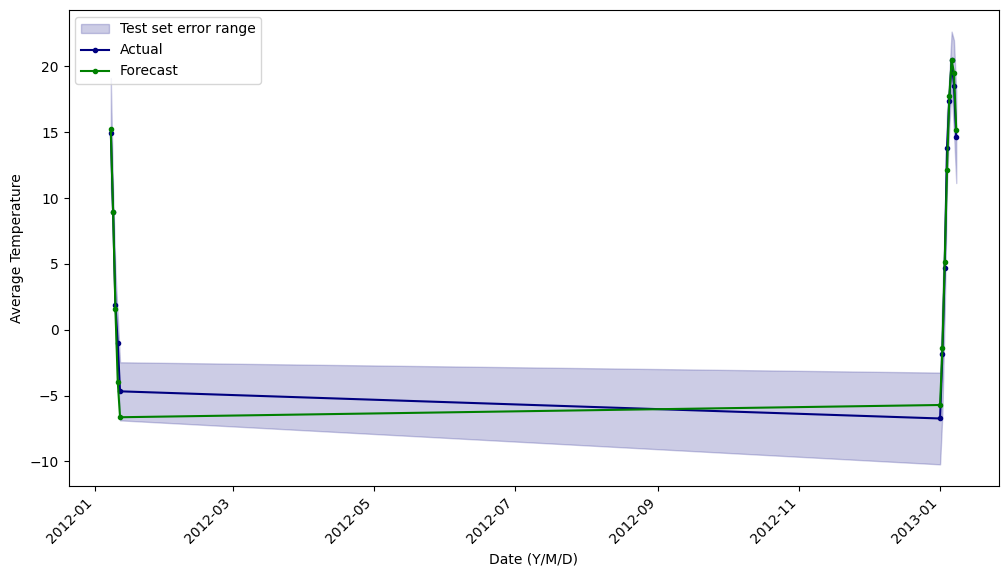

In [65]:
plt.figure(figsize = (15, 15))

plt.fill_between(test_date_trimmed, lower_test, upper_test, alpha = 0.2, label = 'Test set error range', color = 'navy')
plot_from_data(test_set_df,test_date_trimmed, c = 'navy', with_ticks=True, label = 'Actual')
plot_from_data(forec_df, test_date_trimmed, c = 'green', with_ticks=True, label = 'Forecast')

plt.legend(loc = 2);
